<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# PCA Lab: Speed Dating

_Authors: Kiefer Katovich (SF)_

---

Let's practice principal component analysis (PCA) using a data set from Kaggle. PCA is often used to simplify data, reduce noise, and find unmeasured latent variables, so it's important to take the time to understand what's going on.

**In this lab, we will:**

- Explore how PCA relates to correlation.
- Use PCA to perform dimensionality reduction.
- Predict whether or not a speed dater likes reading based on the dater's other likes.

---

### Data Set

The data set we're using for this lab is a subset of this [much more detailed speed dating data set](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (i.e., successes with or opinions of other individuals). 

It also contains no follow-up information where individuals are asked the same questions about themselves again. It only contains information about what an individual enjoys doing, their self-ratings on how desirable they are, and how they think others rate them based on desirability.

The columns present in the data are outlined below:

FieldName|Description
---------|-----------
    subject_id                   |   Unique individual identifier.
    wave                         |   Meetup ID.
    like_sports                  |   Enjoyment of participating in sports.
    like_tvsports                |   Enjoyment of watching sports on TV.
    like_exercise                |   Enjoyment of exercise.
    like_food                    |   Enjoyment of food.
    like_museums                 |   Enjoyment of museums.
    like_art                     |   Enjoyment of art.
    like_hiking                  |   Enjoyment of hiking.
    like_gaming                  |   Enjoyment of playing games.
    like_clubbing                |   Enjoyment of going clubbing/partying.
    like_reading                 |   Enjoyment of reading.
    like_tv                      |   Enjoyment of TV in general.
    like_theater                 |   Enjoyment of the theater (plays, musicals, etc.).
    like_movies                  |   Enjoyment of movies.
    like_concerts                |   Enjoyment of concerts.
    like_music                   |   Enjoyment of music.
    like_shopping                |   Enjoyment of shopping.
    like_yoga                    |   Enjoyment of yoga.
    subjective_attractiveness    |   How attractive they rate themselves.
    subjective_sincerity         |   How sincere they rate themselves.
    subjective_intelligence      |   How intelligent they rate themselves.
    subjective_fun               |   How fun they rate themselves.
    subjective_ambition          |   How ambitious they rate themselves.
    objective_attractiveness     |   Perceived rating others would give them on how attractive they are.
    objective_sincerity          |   Perceived rating others would give them on how sincere they are.
    objective_intelligence       |   Perceived rating others would give them on how intelligent they are.
    objective_fun                |   Perceived rating others would give them on how fun they are.
    objective_ambition           |   Perceived rating others would give them on how ambitious they are.
    
There are 551 subjects total.

---

### 1) Load packages.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format = 'retina'

---

### 2) Load and clean the speed dating data.

- First, remove columns with more than 200 missing values.
- Then, remove rows with missing values.
- Verify that no rows contain NaNs.

In [10]:
sd = pd.read_csv('./datasets/speed_dating.csv')

# A:

In [11]:
sd.isnull().sum()

subject_id                     0
wave                           0
like_sports                    7
like_tvsports                  7
like_exercise                  7
like_food                      7
like_museums                   7
like_art                       7
like_hiking                    7
like_gaming                    7
like_clubbing                  7
like_reading                   7
like_tv                        7
like_theater                   7
like_movies                    7
like_concerts                  7
like_music                     7
like_shopping                  7
like_yoga                      7
subjective_attractiveness      9
subjective_sincerity           9
subjective_intelligence        9
subjective_fun                 9
subjective_ambition            9
objective_attractiveness     237
objective_sincerity          237
objective_intelligence       237
objective_fun                237
objective_ambition           237
dtype: int64

In [12]:

#remove columns with more than 200 missing values.

sd.drop(columns=['objective_attractiveness','objective_sincerity','objective_intelligence','objective_fun','objective_ambition'],
            inplace=True)

In [13]:
#remove rows with missing values.
sd.dropna(inplace=True)

In [14]:
#Verify that no rows contain NaNs.
sd.isnull().sum()

subject_id                   0
wave                         0
like_sports                  0
like_tvsports                0
like_exercise                0
like_food                    0
like_museums                 0
like_art                     0
like_hiking                  0
like_gaming                  0
like_clubbing                0
like_reading                 0
like_tv                      0
like_theater                 0
like_movies                  0
like_concerts                0
like_music                   0
like_shopping                0
like_yoga                    0
subjective_attractiveness    0
subjective_sincerity         0
subjective_intelligence      0
subjective_fun               0
subjective_ambition          0
dtype: int64

In [15]:
# A:
sd.head()

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,like_movies,like_concerts,like_music,like_shopping,like_yoga,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,...,10.0,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0
1,2,1,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,...,8.0,7.0,8.0,3.0,1.0,7.0,5.0,8.0,10.0,3.0
2,3,1,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,...,7.0,7.0,5.0,8.0,7.0,8.0,9.0,9.0,8.0,8.0
3,4,1,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,...,7.0,8.0,7.0,1.0,8.0,7.0,8.0,7.0,9.0,8.0
4,5,1,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,...,6.0,3.0,7.0,8.0,3.0,6.0,3.0,10.0,6.0,8.0


---

### 3) Example: Are the `subjective` columns correlated?

Here, we'll understand how the `subjective` columns are correlated.

- Find the z scores of each `subjective` column (i.e. standardize the `subjective` columns).
- Visualize correlation using [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).
- Visualize correlation using a heat map.

**3.A) Find the z scores of each column. This allows the columns to more easily be directly compared.**

In [18]:
subjective_cols = [col for col in sd.columns if col.startswith('subjective')]
# A:
subjective_cols

['subjective_attractiveness',
 'subjective_sincerity',
 'subjective_intelligence',
 'subjective_fun',
 'subjective_ambition']

In [19]:
X = sd[subjective_cols]

In [20]:
sc = StandardScaler()
sub_z = sc.fit_transform(X)
sub_z

array([[-0.78647228, -0.20271555, -0.35419405,  0.19332293, -0.32358876],
       [-0.06642502, -2.32926706, -0.35419405,  1.48691586, -2.564932  ],
       [ 0.65362224,  0.50613495,  0.56433788,  0.19332293,  0.23674705],
       ...,
       [-0.06642502, -0.91156605, -1.27272598, -0.45347354, -0.32358876],
       [-0.06642502, -0.20271555, -0.35419405, -3.04065939, -1.44426038],
       [ 0.65362224, -0.91156605, -1.27272598, -1.10027   , -0.32358876]])

In [21]:
sub_zdf = pd.DataFrame(sub_z, columns=subjective_cols)
sub_zdf.head()

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,-0.786472,-0.202716,-0.354194,0.193323,-0.323589
1,-0.066425,-2.329267,-0.354194,1.486916,-2.564932
2,0.653622,0.506135,0.564338,0.193323,0.236747
3,-0.066425,-0.202716,-1.272726,0.840119,0.236747
4,-0.786472,-3.746968,1.482870,-1.100270,0.236747


**3.B) Use a PairGrid to visualize correlation.**

[`PairGrid`](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) is more general version of `pairplot`.  For example, you could use the following code, where `subjective` is a data frame containing only the subjective columns:

```python
g = sns.PairGrid(subjective)
# Regression plots in lower triangle
g = g.map_lower(sns.regplot) 
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show()
```

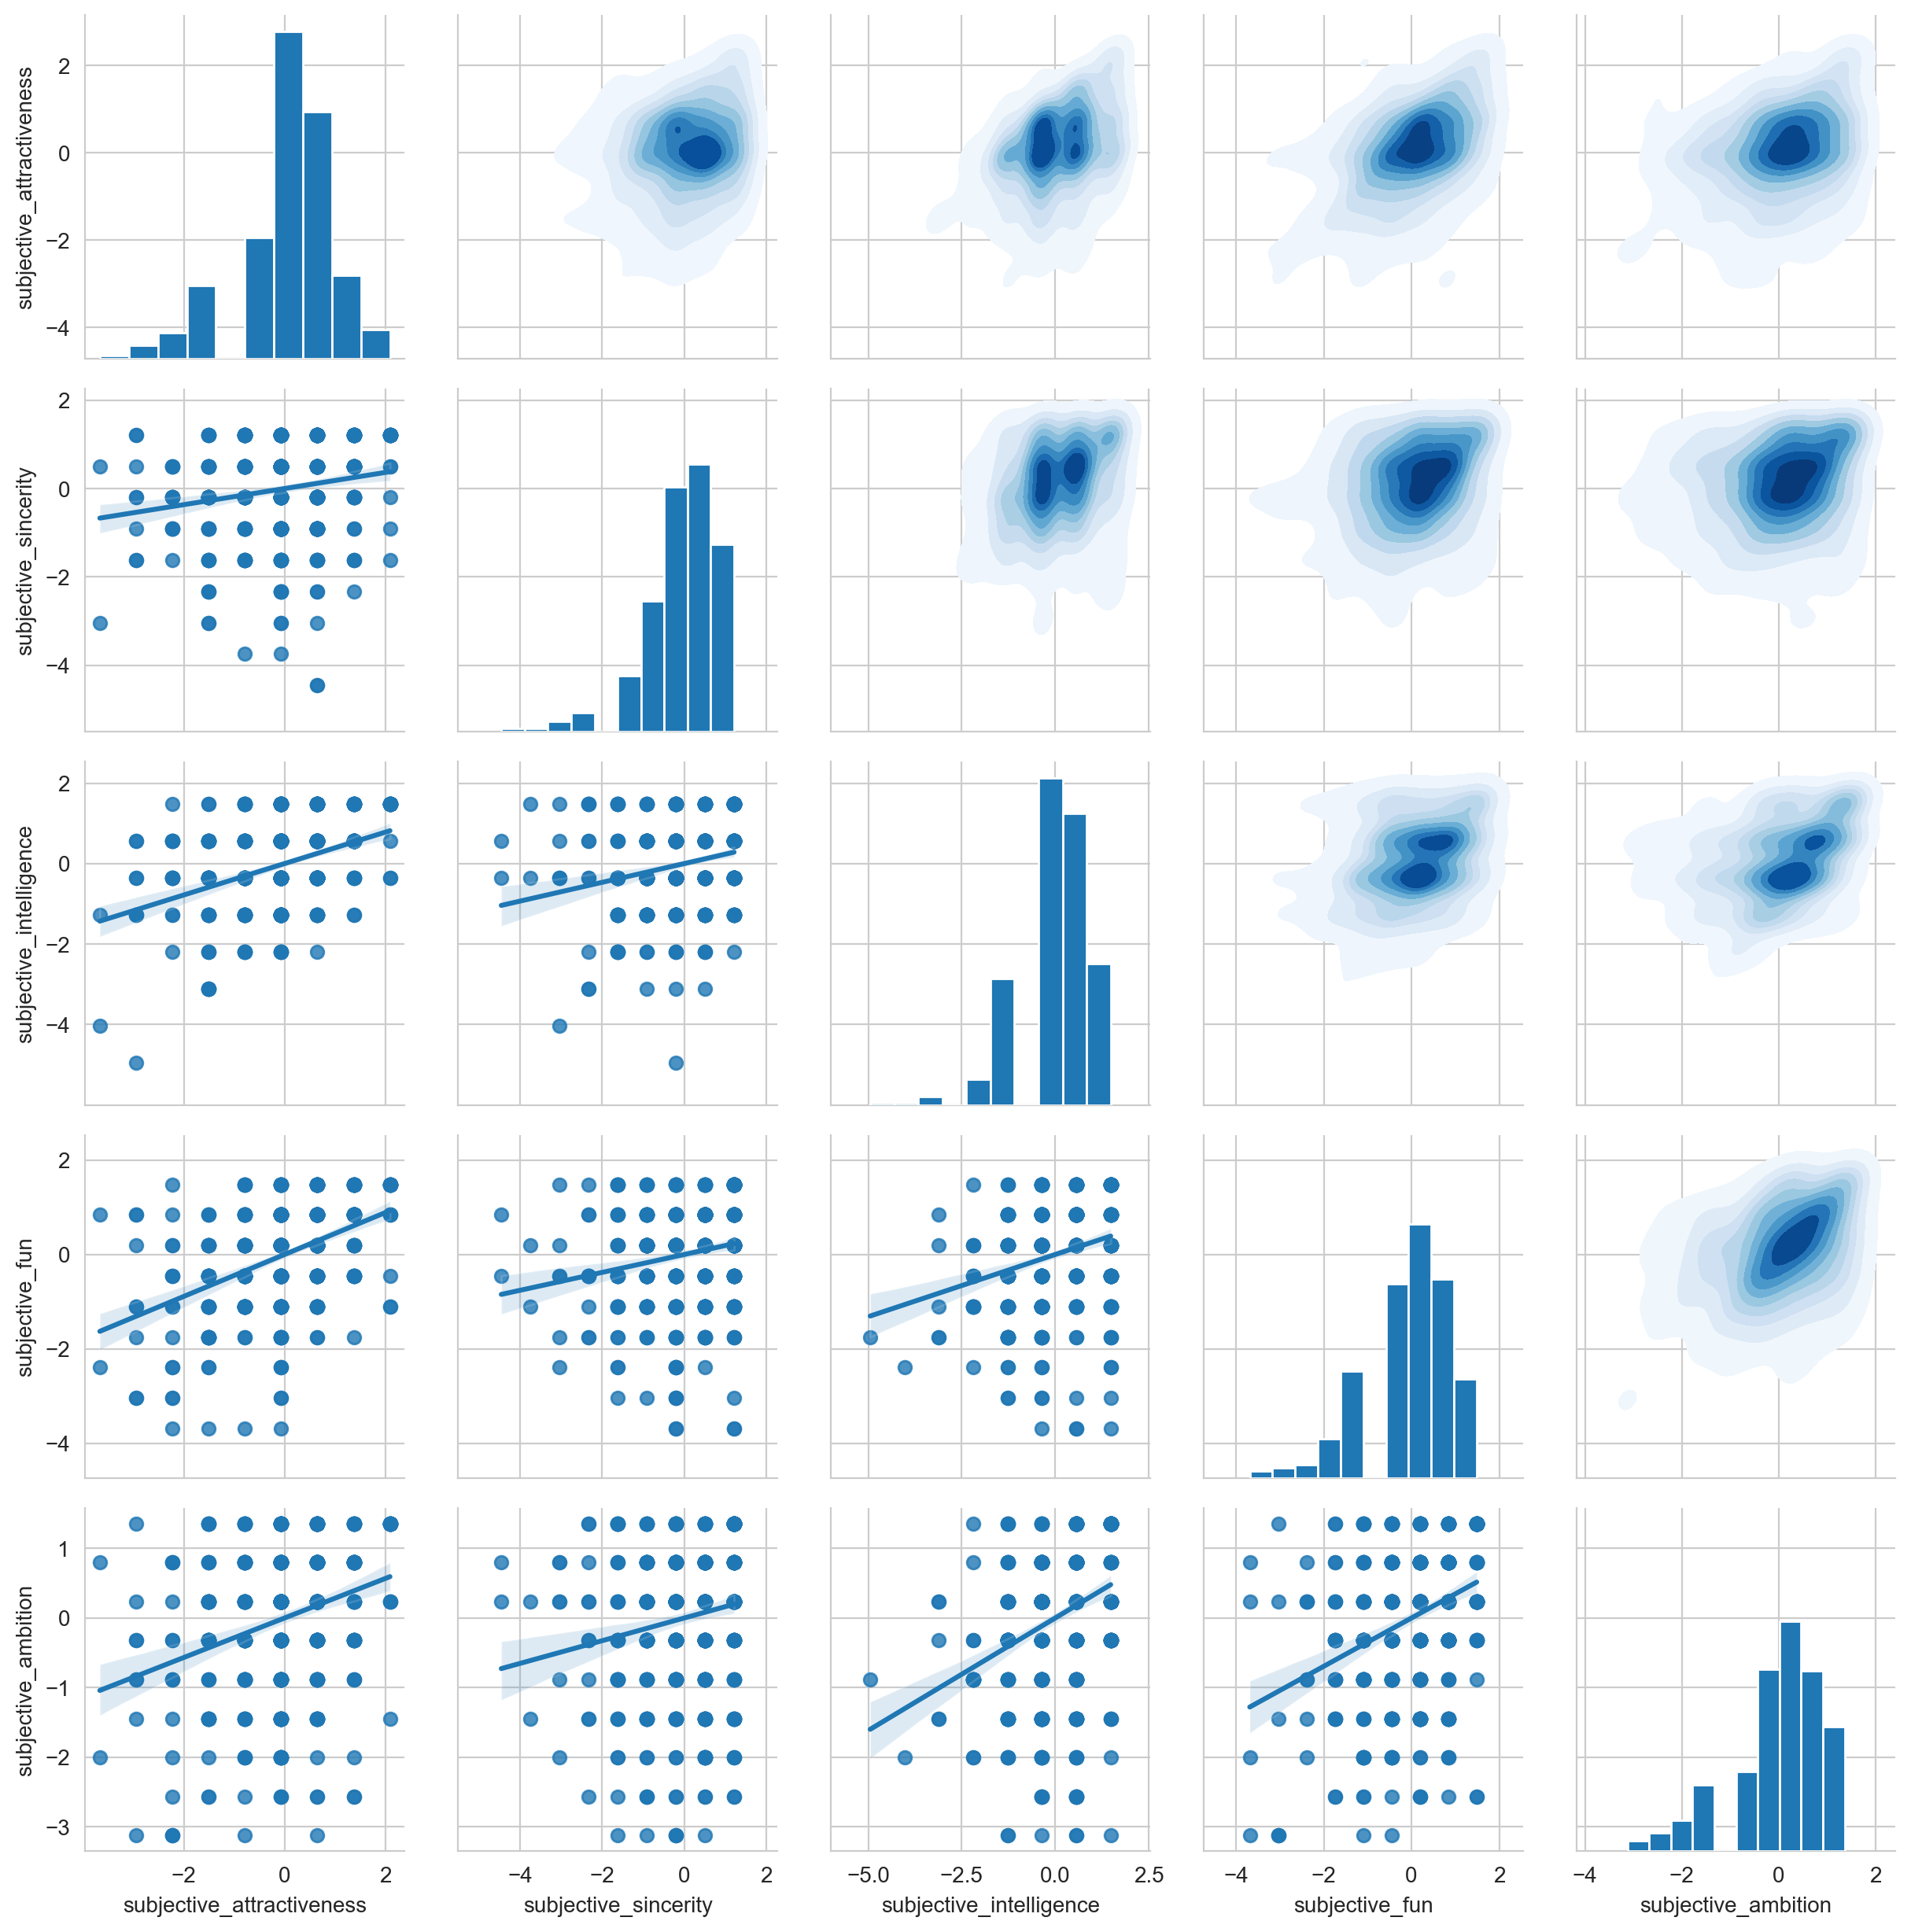

In [24]:
# A:
g = sns.PairGrid(sub_zdf)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05) # shade is changed to fill , and shade_lowest is changed to thresh
g = g.map_diag(plt.hist)

plt.show();

**3.C) Use a heat map to visualize correlation.**

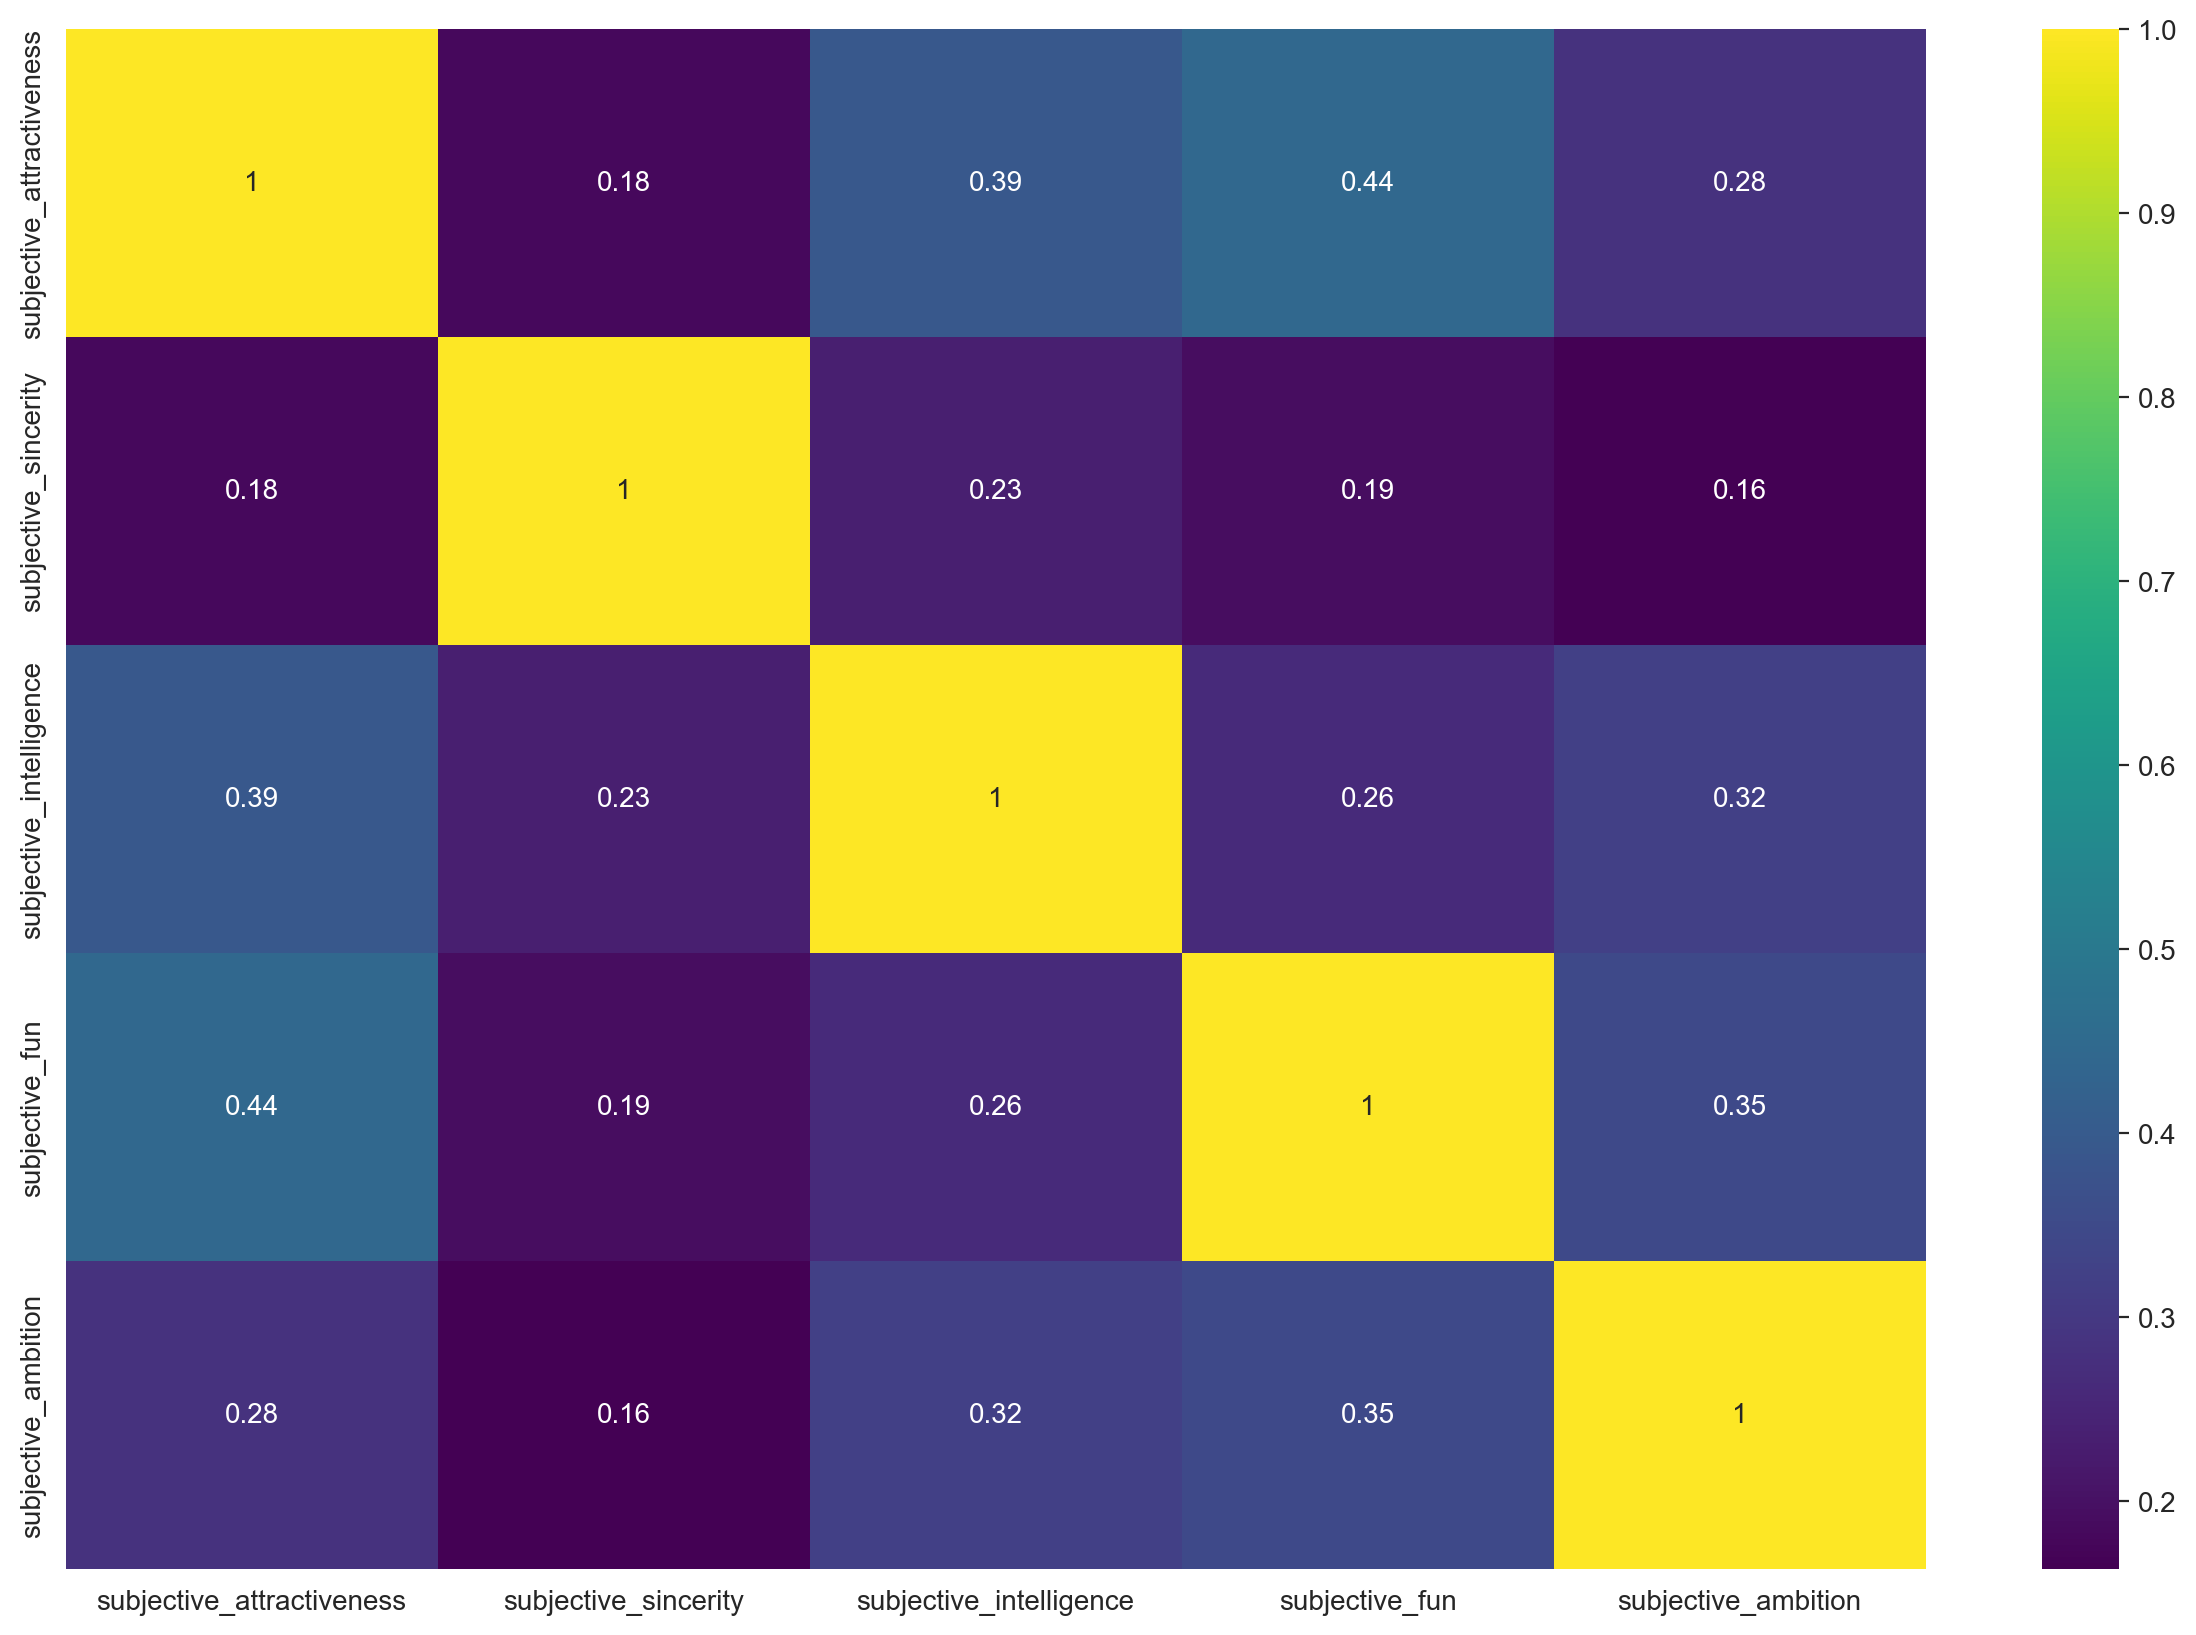

In [26]:
# A:
plt.figure(figsize=(15,10))
sns.heatmap(sub_zdf.corr(), 
            annot = True, 
            cmap = 'viridis');

In [27]:
# A:

---

**Important: Did you ensure the results make sense intuitively?** If not, look at the results again. You should **always** interpret your results and ensure they make sense based on what you expected. If they don’t, investigate why — sometimes your analysis or data are wrong.

> For example, the results show that believing you are attractive and fun are correlated. Would you expect that believing you are intellectual and fun to have a higher or lower correlation? What do the results say?

---


### 4) Visualize some preference columns.

Next, we’ll explore how some preference ratings are correlated. You saw an example — now try it on the `preference_cols` below.

- Find the z scores of each column in `preference_cols`.
- Visualize correlation using PairGrid.
- Visualize correlation using a heat map.
- Do these results make sense intuitively? 

In [29]:
preference_cols = ['like_tvsports', 'like_sports', 'like_museums', 
                   'like_theater', 'like_shopping']
sd_like = sd[preference_cols]

**4.A) Find the z scores of each column in `preference_cols`.**

In [31]:
# A:
sc = StandardScaler()
sdlike_z = sc.fit_transform(sd_like)
sdlike_z

array([[-0.91277993,  0.99253939, -2.9350508 , -2.56086869,  0.9132538 ],
       [-0.91277993, -1.29177631,  0.49761959,  0.98557866, -1.00083575],
       [ 1.23044052, -1.29177631, -0.97352486,  0.09896682,  0.9132538 ],
       ...,
       [-0.55557652, -0.53033775,  0.0072381 ,  0.09896682,  0.14761798],
       [-1.26998334, -0.14961846,  0.0072381 , -0.78764502,  0.53043589],
       [-0.91277993,  0.6118201 ,  1.47838255,  0.09896682,  0.53043589]])

In [32]:
sdlike_zdf = pd.DataFrame(sdlike_z, columns=subjective_cols)
sdlike_zdf.head()

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,-0.912780,0.992539,-2.935051,-2.560869,0.913254
1,-0.912780,-1.291776,0.497620,0.985579,-1.000836
2,1.230441,-1.291776,-0.973525,0.098967,0.913254
3,-1.269983,-2.053215,-0.483143,0.985579,-1.766472
4,-0.198373,0.231101,-0.483143,-0.344339,0.913254


**4.B) Visualize correlation using PairGrid.**

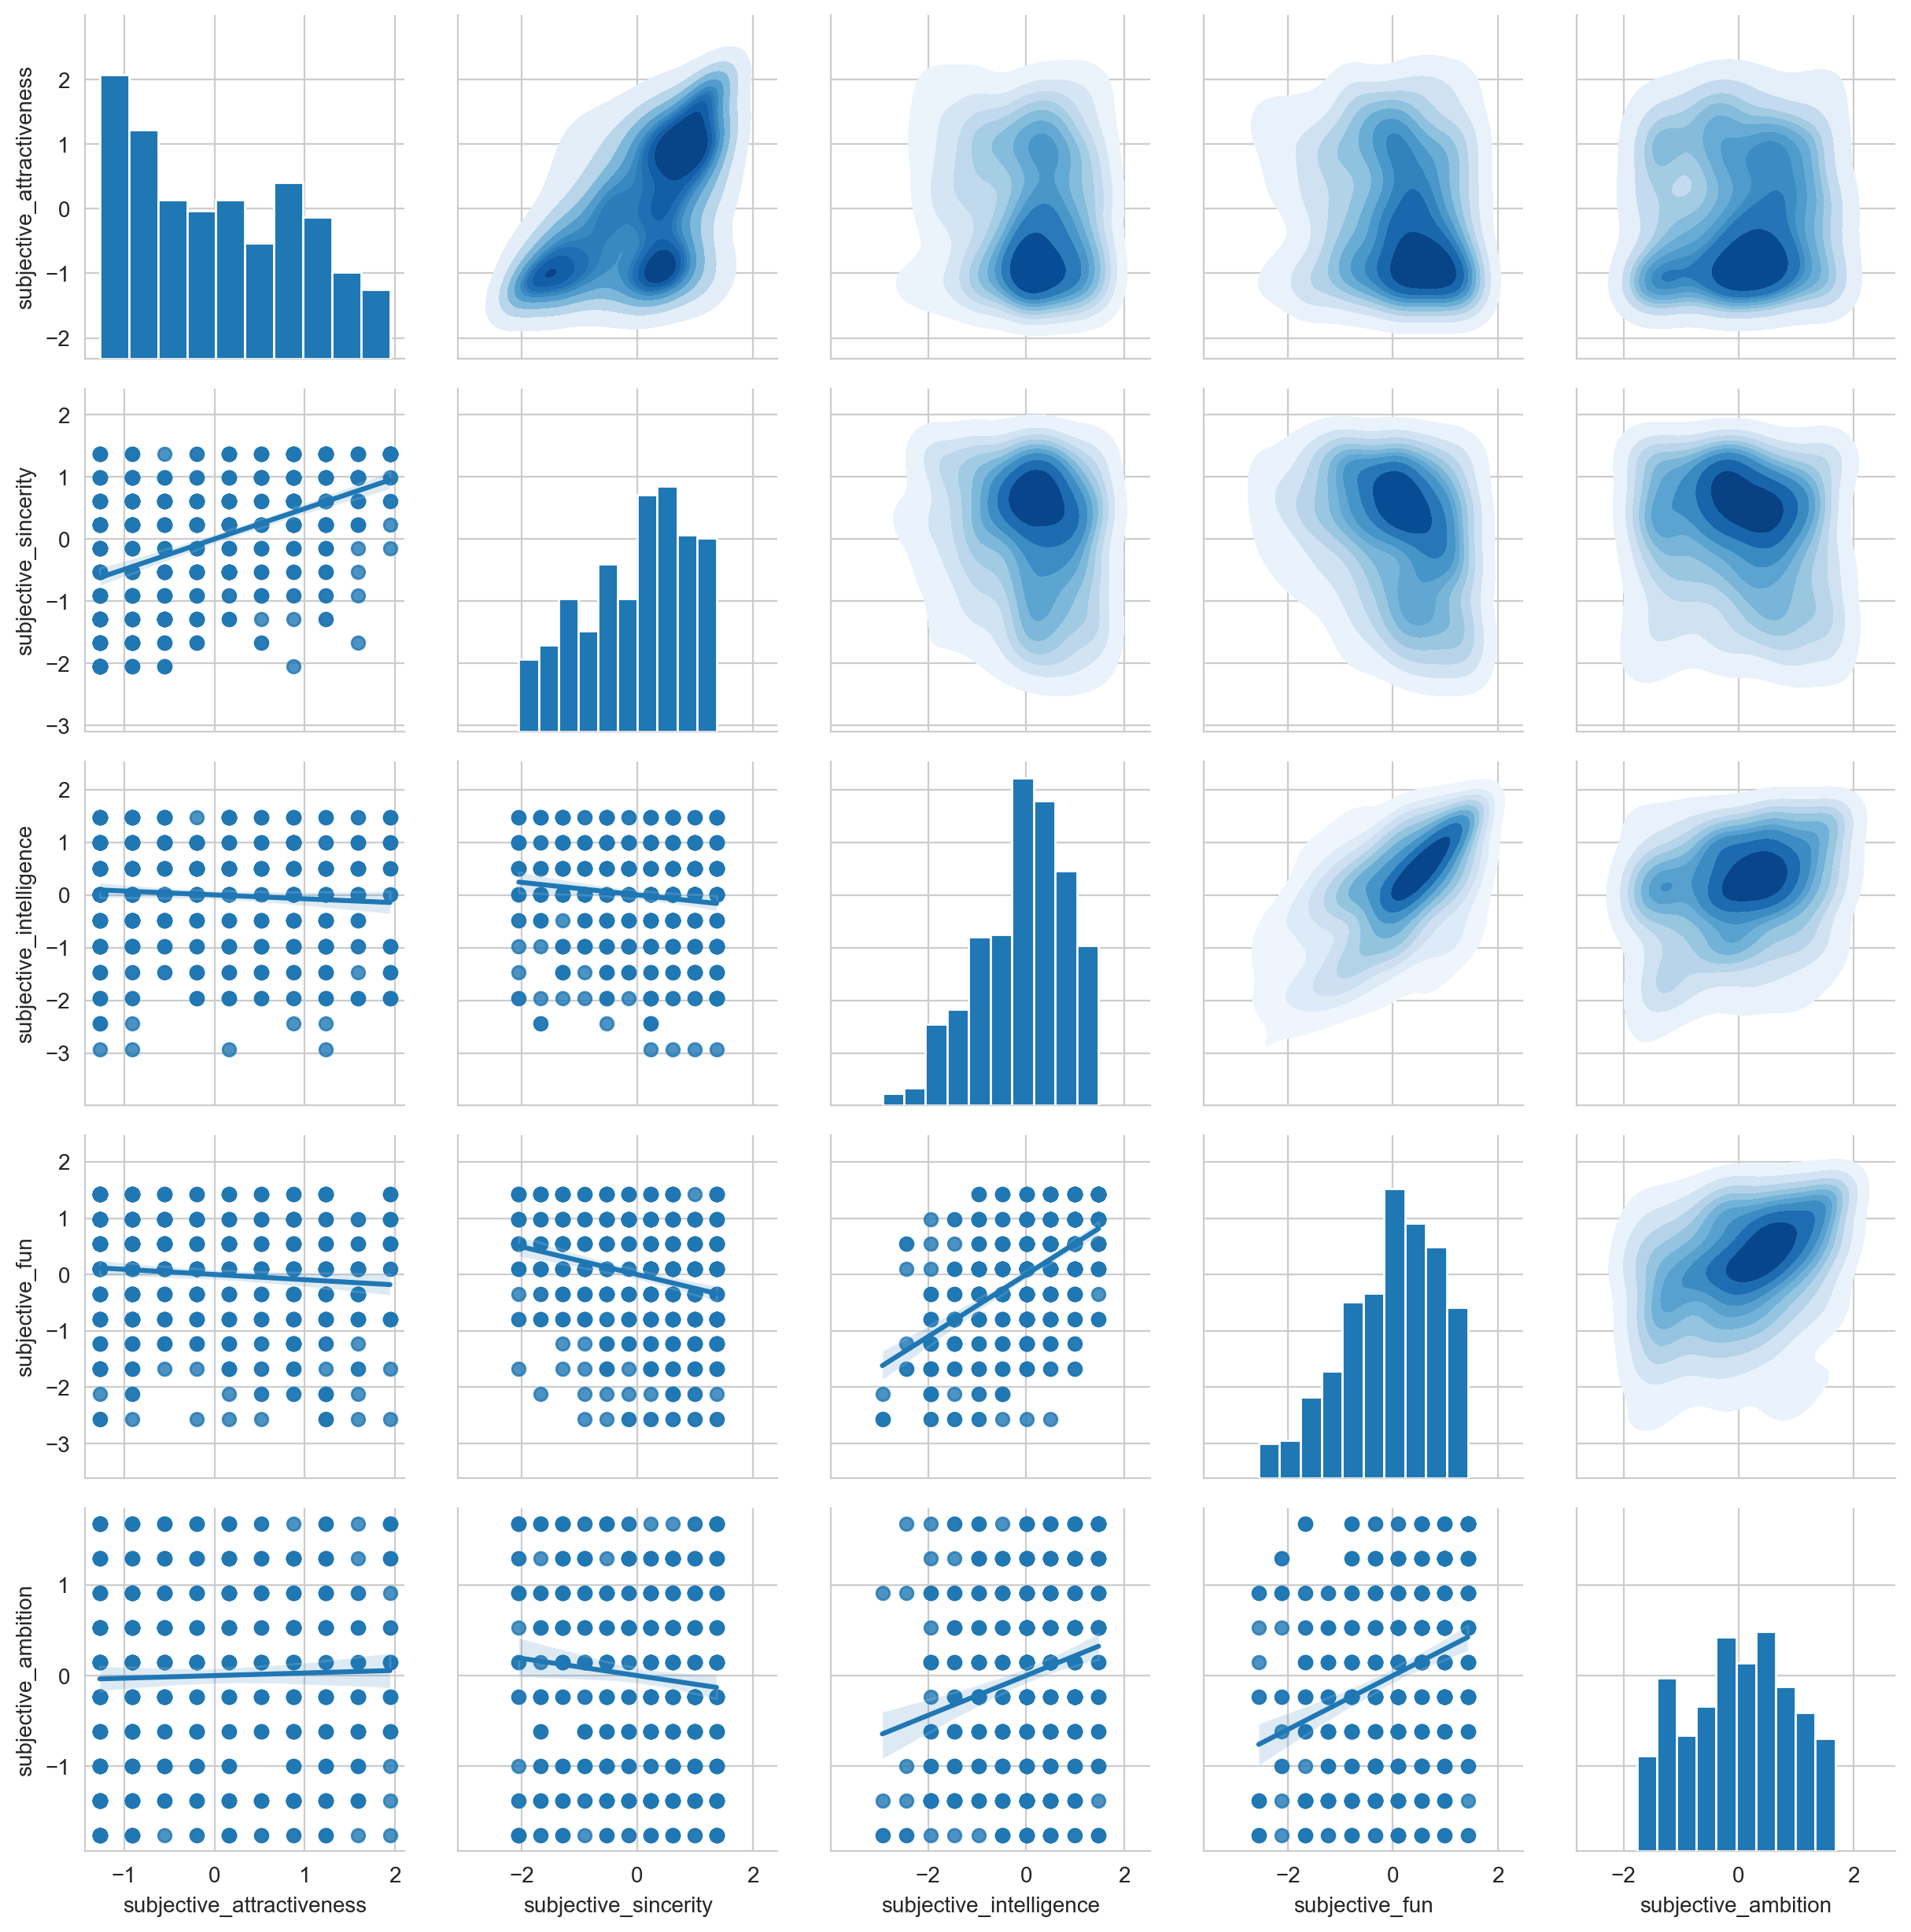

In [34]:
# A:
g = sns.PairGrid(sdlike_zdf)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05) # shade is changed to fill , and shade_lowest is changed to thresh
g = g.map_diag(plt.hist)

plt.show();

**4.C) Visualize correlation using a heat map.**

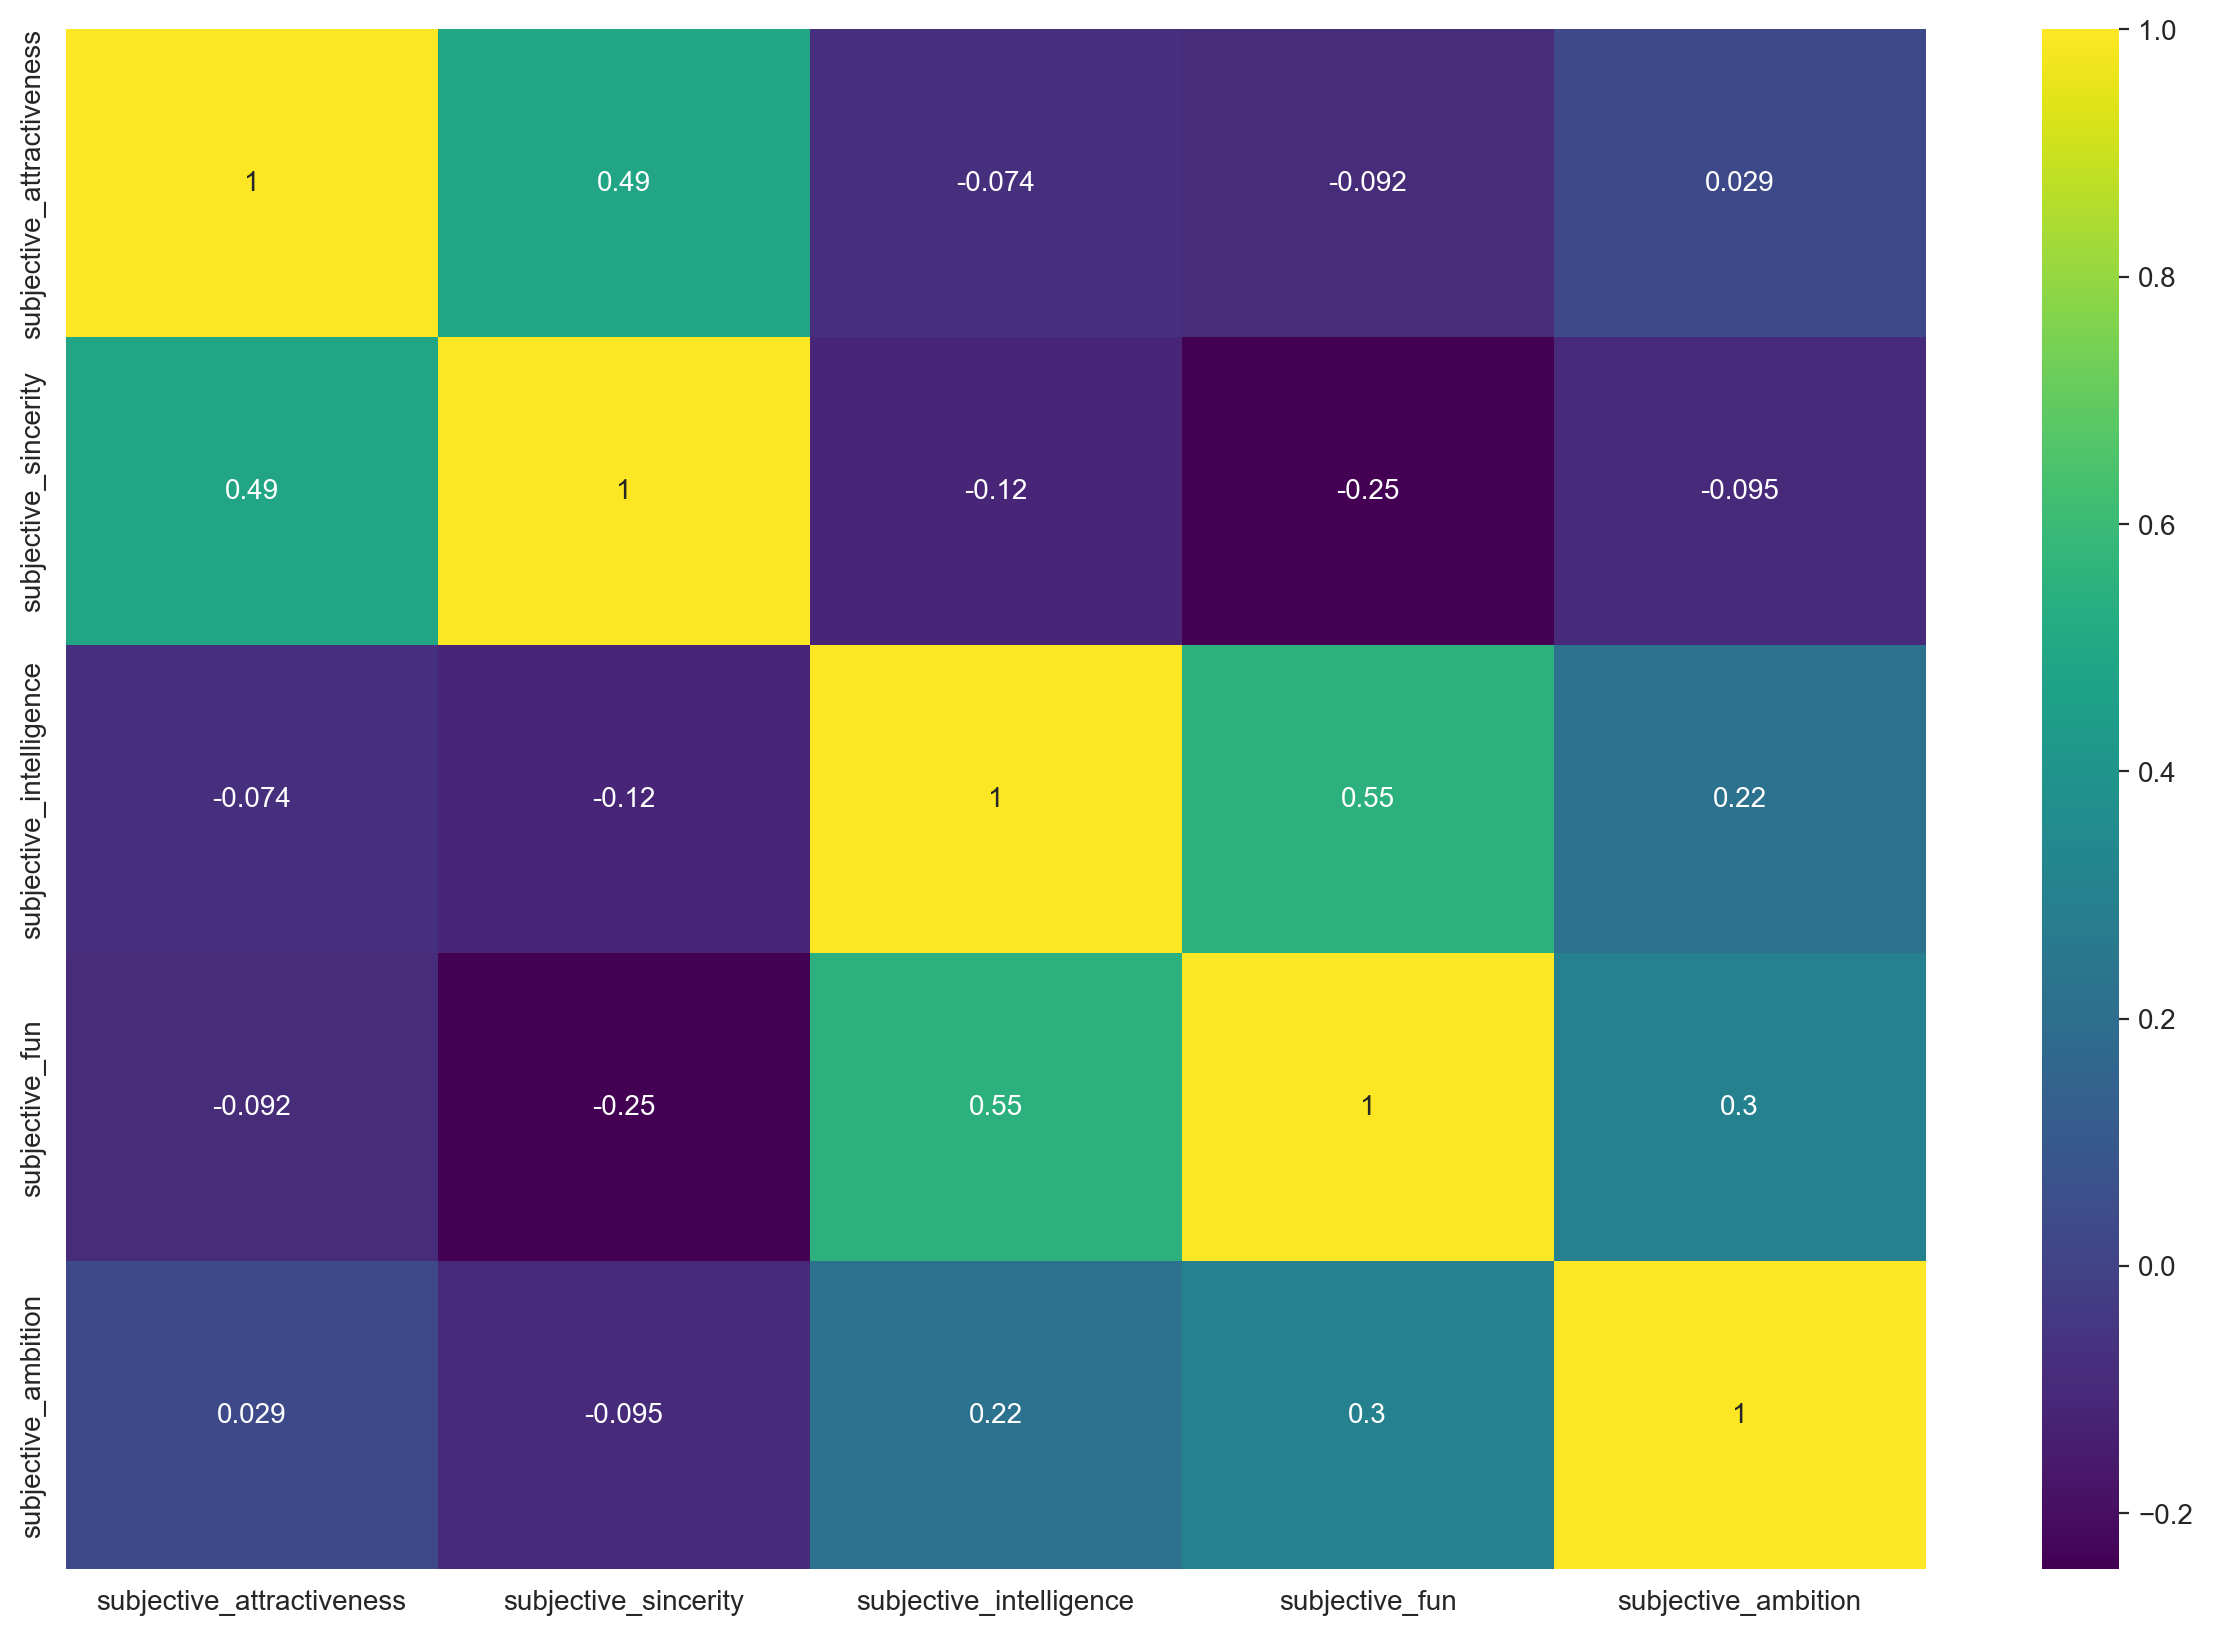

In [36]:
# A:
# A:
plt.figure(figsize=(15,10))
sns.heatmap(sdlike_zdf.corr(), 
            annot = True, 
            cmap = 'viridis');

---

### 5) Example: Fit PCA on the subjective ratings.

In [38]:
subjective_pca = PCA(n_components=5)
subjective_pca.fit(sub_z)

PCA(n_components=5)

In [39]:
Z_train = subjective_pca.transform(sub_z)

In [40]:
Z_train

array([[ 0.673942  ,  0.03439955, -0.10382612, -0.35798348,  0.57693667],
       [ 1.35044583,  2.02341707, -2.13879048,  1.07112465,  1.64483811],
       [-0.94967947, -0.27146457, -0.03924025,  0.28967741, -0.18508884],
       ...,
       [ 1.27802939,  0.74844718, -0.36801805, -0.31785638, -0.5792599 ],
       [ 2.37402987, -0.92246551,  0.44869284,  1.6557433 , -1.43968236],
       [ 1.22960363,  0.72837603, -0.34611708,  0.16632973, -1.41541178]])

---

**5.A) Look at the weights of the principal components.**

The principal components (or eigenvectors!) are simply the weights or coefficients on the original variables $X$ that transforms them to $Z$.

In [42]:
# A:
pd.DataFrame(subjective_pca.components_, columns=subjective_cols)

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,-0.501894,-0.315290,-0.467071,-0.483864,-0.443187
1,0.218260,-0.909060,-0.097690,0.274010,0.203342
2,-0.402024,-0.144386,0.422893,-0.481414,0.637912
3,0.348119,-0.213776,0.648420,-0.361047,-0.531328
4,-0.646263,-0.087491,0.415949,0.573306,-0.270179


---

**5.B) Look at the explained variance values (aka eigenvalues) and the explained variance ratios.**

The eigenvalues are ordered such that the first components have the largest eigenvalues. The values and their normalized equivalent in the explained variance ratio attribute tell you how much of the variance in the original data is encapsulated in the new component variables.

In [44]:
# A:
# Pull the explained variance attribute
var_exp = subjective_pca.explained_variance_ratio_
print(f'Explained variance ( 5 components): {np.round(var_exp[:5],3)}')

Explained variance ( 5 components): [0.431 0.178 0.147 0.144 0.1  ]


---

**5.C) Transform the subjective data into the principal component space.**

The `transform()` function in the PCA will create your new component variable matrix.

In [46]:
# A:Z_train = subjective_pca.transform(sub_z) above at 5)
sub_transf_df = pd.DataFrame(Z_train, columns=subjective_cols)

In [47]:
sub_transf_df.head()

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,0.673942,0.034400,-0.103826,-0.357983,0.576937
1,1.350446,2.023417,-2.138790,1.071125,1.644838
2,-0.949679,-0.271465,-0.039240,0.289677,-0.185089
3,0.180279,0.572457,-0.735675,-1.234162,-0.051044
4,1.310959,2.836358,2.164996,1.760209,0.758137


This transformed our five-dimensional data set into vectors along its five principal components (with zero loss).
- Using these, we can now reduce the dimensionality of our data while minimizing loss.
- For example, taking only the first three eigenvectors accounts for `0.431 + 0.178 + 0.147 = 75.6%` of the variance.

In [49]:
# A: Explained variance (first 5 components): [0.431 0.178 0.147 0.144 0.1  ]

cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (5 components): {np.round(cum_var_exp[:3],3)}')

Cumulative explained variance (5 components): [0.431 0.609 0.756]


---

**5.D) PCA-transformed features are not correlated.**

- Keep in mind that each column in the transformed data is no longer correlated.
- Compare this to the exploration above where many columns were correlated.

In [51]:
# A:

print("Original data:")
print(sub_zdf.corr())

print("\nPCA-transformed data:")
print(sub_transf_df.corr())

Original data:
                           subjective_attractiveness  subjective_sincerity  \
subjective_attractiveness                   1.000000              0.182410   
subjective_sincerity                        0.182410              1.000000   
subjective_intelligence                     0.390144              0.233328   
subjective_fun                              0.444195              0.189761   
subjective_ambition                         0.283712              0.163047   

                           subjective_intelligence  subjective_fun  \
subjective_attractiveness                 0.390144        0.444195   
subjective_sincerity                      0.233328        0.189761   
subjective_intelligence                   1.000000        0.263585   
subjective_fun                            0.263585        1.000000   
subjective_ambition                       0.323155        0.346745   

                           subjective_ambition  
subjective_attractiveness             0.283712

---

### 6) Optional: How were the data transformed?

To demonstrate how the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component (PC1) manually.

**6.A) Pull out the eigenvector for PC1.**

In [53]:
# A: Original performance
sd.columns

Index(['subject_id', 'wave', 'like_sports', 'like_tvsports', 'like_exercise',
       'like_food', 'like_museums', 'like_art', 'like_hiking', 'like_gaming',
       'like_clubbing', 'like_reading', 'like_tv', 'like_theater',
       'like_movies', 'like_concerts', 'like_music', 'like_shopping',
       'like_yoga', 'subjective_attractiveness', 'subjective_sincerity',
       'subjective_intelligence', 'subjective_fun', 'subjective_ambition'],
      dtype='object')

In [54]:
sc = StandardScaler()
sd_df = sc.fit_transform(sd)

sdpca = PCA()
sdpca.fit(sd_df)

eigenvector_pc1 = sdpca.components_[0]

print(f"Eigenvector for PC1: {eigenvector_pc1}")

Eigenvector for PC1: [-0.05852309 -0.066734    0.0507745   0.00646697 -0.03606578 -0.28034371
 -0.36627896 -0.36779618 -0.09386432 -0.02412767 -0.10745452 -0.16706483
 -0.13427584 -0.34638683 -0.27465139 -0.29989469 -0.25940149 -0.24659606
 -0.22335666 -0.15105775 -0.15158791 -0.09688964 -0.1830467  -0.14581598]


**6.B) Create a DataFrame showing the original values for the subjective variables for `person1`.**

In [56]:
# A:
df = pd.DataFrame(sd)

# Filter data for Person 1 (subject_id = 1)
person1_data = df[df['subject_id'] == 1]
person1_data

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,like_movies,like_concerts,like_music,like_shopping,like_yoga,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,...,10.0,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0


**6.C) Add the eigenvector for PC1: the weights by which to multiply each original variable.**

Recall that each component is a linear combination of the original variables, multiplied by a "weight" defined in the eigenvector of that component.

In [58]:
# A:
weights = pd.DataFrame({
    'Variable': df.columns,
    'PC1 Weight': eigenvector_pc1
})
print(weights)

                     Variable  PC1 Weight
0                  subject_id   -0.058523
1                        wave   -0.066734
2                 like_sports    0.050774
3               like_tvsports    0.006467
4               like_exercise   -0.036066
5                   like_food   -0.280344
6                like_museums   -0.366279
7                    like_art   -0.367796
8                 like_hiking   -0.093864
9                 like_gaming   -0.024128
10              like_clubbing   -0.107455
11               like_reading   -0.167065
12                    like_tv   -0.134276
13               like_theater   -0.346387
14                like_movies   -0.274651
15              like_concerts   -0.299895
16                 like_music   -0.259401
17              like_shopping   -0.246596
18                  like_yoga   -0.223357
19  subjective_attractiveness   -0.151058
20       subjective_sincerity   -0.151588
21    subjective_intelligence   -0.096890
22             subjective_fun   -0

**6.D) Multiply the original variable values by the eigenvector values.**

These are the "pieces" of PC1 that will be added together to create the new value for that person.

In [60]:
# A:
pc1_contributions = pd.DataFrame(sd * eigenvector_pc1, columns=df.columns)
pc1_contributions['PC1'] = pc1_contributions.sum(axis=1)

pc1_contributions

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,like_concerts,like_music,like_shopping,like_yoga,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition,PC1
0,-0.058523,-0.066734,0.456970,0.012934,-0.288526,-2.523093,-0.366279,-0.367796,-0.469322,-0.024128,...,-2.998947,-2.334613,-1.972768,-0.223357,-0.906346,-1.212703,-0.775117,-1.464374,-1.020712,-22.444479
1,-0.117046,-0.066734,0.152323,0.012934,-0.252460,-2.803437,-2.930232,-2.206777,-0.281593,-0.120638,...,-2.099263,-2.075212,-0.739788,-0.223357,-1.057404,-0.757940,-0.775117,-1.830467,-0.437448,-26.588909
2,-0.175569,-0.066734,0.152323,0.051736,-0.252460,-2.242750,-1.831395,-1.838981,-0.750915,-0.096511,...,-2.099263,-1.297007,-1.972768,-1.563497,-1.208462,-1.364291,-0.872007,-1.464374,-1.166528,-27.187652
3,-0.234092,-0.066734,0.050774,0.006467,-0.216395,-1.962406,-2.197674,-2.574573,-0.657050,-0.120638,...,-2.399158,-1.815810,-0.246596,-1.786853,-1.057404,-1.212703,-0.678227,-1.647420,-1.166528,-27.884629
4,-0.292615,-0.066734,0.355421,0.025868,-0.252460,-1.962406,-2.197674,-2.942369,-0.563186,-0.144766,...,-0.899684,-1.815810,-1.972768,-0.670070,-0.906346,-0.454764,-0.968896,-1.098280,-1.166528,-24.656530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,-32.070653,-1.401414,0.507745,0.051736,-0.144263,-2.803437,-1.098837,-0.735592,-0.187729,-0.120638,...,-2.099263,-2.594015,-0.986384,-0.223357,-1.510577,-1.515879,-0.968896,-1.830467,-1.458160,-56.640230
547,-32.129176,-1.401414,0.406196,0.032335,-0.216395,-2.523093,-2.563953,-2.574573,-0.375457,-0.193021,...,-2.998947,-2.594015,-1.972768,-0.446713,-1.057404,-1.515879,-0.872007,-1.464374,-1.312344,-63.710329
548,-32.187699,-1.401414,0.253872,0.019401,-0.180329,-2.523093,-2.563953,-2.942369,-0.281593,-0.072383,...,-1.199579,-1.556409,-1.479576,-0.670070,-1.057404,-1.061115,-0.678227,-1.281327,-1.020712,-58.830230
549,-32.246222,-1.401414,0.304647,0.006467,-0.252460,-1.682062,-2.563953,-1.103389,-0.187729,-0.024128,...,-2.099263,-1.815810,-1.726172,-0.223357,-1.057404,-1.212703,-0.775117,-0.549140,-0.729080,-55.409513


**6.E) Sum the original values multiplied by the eigenvector weights to get `person1`’s value for PC1.**

In [62]:
# A:
person1_std = sd.iloc[0]
person1_contributions =  person1_std* eigenvector_pc1

person1_pc1 = np.sum(person1_contributions)

print(person1_contributions)

print(person1_pc1)

subject_id                  -0.058523
wave                        -0.066734
like_sports                  0.456970
like_tvsports                0.012934
like_exercise               -0.288526
like_food                   -2.523093
like_museums                -0.366279
like_art                    -0.367796
like_hiking                 -0.469322
like_gaming                 -0.024128
like_clubbing               -0.537273
like_reading                -1.002389
like_tv                     -1.208483
like_theater                -0.346387
like_movies                 -2.746514
like_concerts               -2.998947
like_music                  -2.334613
like_shopping               -1.972768
like_yoga                   -0.223357
subjective_attractiveness   -0.906346
subjective_sincerity        -1.212703
subjective_intelligence     -0.775117
subjective_fun              -1.464374
subjective_ambition         -1.020712
Name: 0, dtype: float64
-22.444479285847542


---

### 7) Fit PCA on the preference data.

Now that you've seen how it's done, try it yourself!

- Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.
- Transform the original `sd_like` columns into the principal component space.
- Verify that these columns are uncorrelated.

In [64]:
# A:
sd_like.columns

Index(['like_tvsports', 'like_sports', 'like_museums', 'like_theater',
       'like_shopping'],
      dtype='object')

In [65]:
sd.head()

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,like_movies,like_concerts,like_music,like_shopping,like_yoga,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,...,10.0,10.0,9.0,8.0,1.0,6.0,8.0,8.0,8.0,7.0
1,2,1,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,...,8.0,7.0,8.0,3.0,1.0,7.0,5.0,8.0,10.0,3.0
2,3,1,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,...,7.0,7.0,5.0,8.0,7.0,8.0,9.0,9.0,8.0,8.0
3,4,1,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,...,7.0,8.0,7.0,1.0,8.0,7.0,8.0,7.0,9.0,8.0
4,5,1,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,...,6.0,3.0,7.0,8.0,3.0,6.0,3.0,10.0,6.0,8.0


In [66]:
sd_pca = PCA(n_components=5)
sd_pca.fit(sd_like)

PCA(n_components=5)

#### 7.A) Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.

In [68]:
# A:sd_pca.components_
sd_pca.explained_variance_

array([11.81445156,  8.62194154,  4.81476322,  3.63861328,  1.97420378])

In [69]:
sd_pca.components_

array([[ 0.62736939,  0.62167038, -0.2330427 , -0.33685671, -0.22836866],
       [-0.44611128, -0.17137686, -0.36194075, -0.44630599, -0.66439789],
       [-0.11063564, -0.08530062, -0.50180641, -0.49012362,  0.69889393],
       [ 0.62338705, -0.74294543, -0.20709265,  0.01934922, -0.12711771],
       [ 0.08087475, -0.15783472,  0.72110537, -0.66838834,  0.04256242]])

#### 7.B) Transform the original `sd_like` columns into the principal component space.

In [71]:
# A:
sdt =sd_pca.transform(sd_like)
like_trans = pd.DataFrame(sdt, columns=preference_cols)
like_trans.head()

,like_tvsports,like_sports,like_museums,like_theater,like_shopping
0,2.813509,3.852697,7.562375,-2.705369,-0.971477
1,-4.100823,2.098915,-2.853924,1.093037,-0.536650
2,-0.105608,-1.921308,2.462398,4.780351,-0.665129
3,-5.048710,4.940457,-2.966862,2.623962,-1.829191
4,-0.024590,-0.738005,2.552055,-0.911421,-0.230473


#### 7.C) Verify that these columns are uncorrelated.

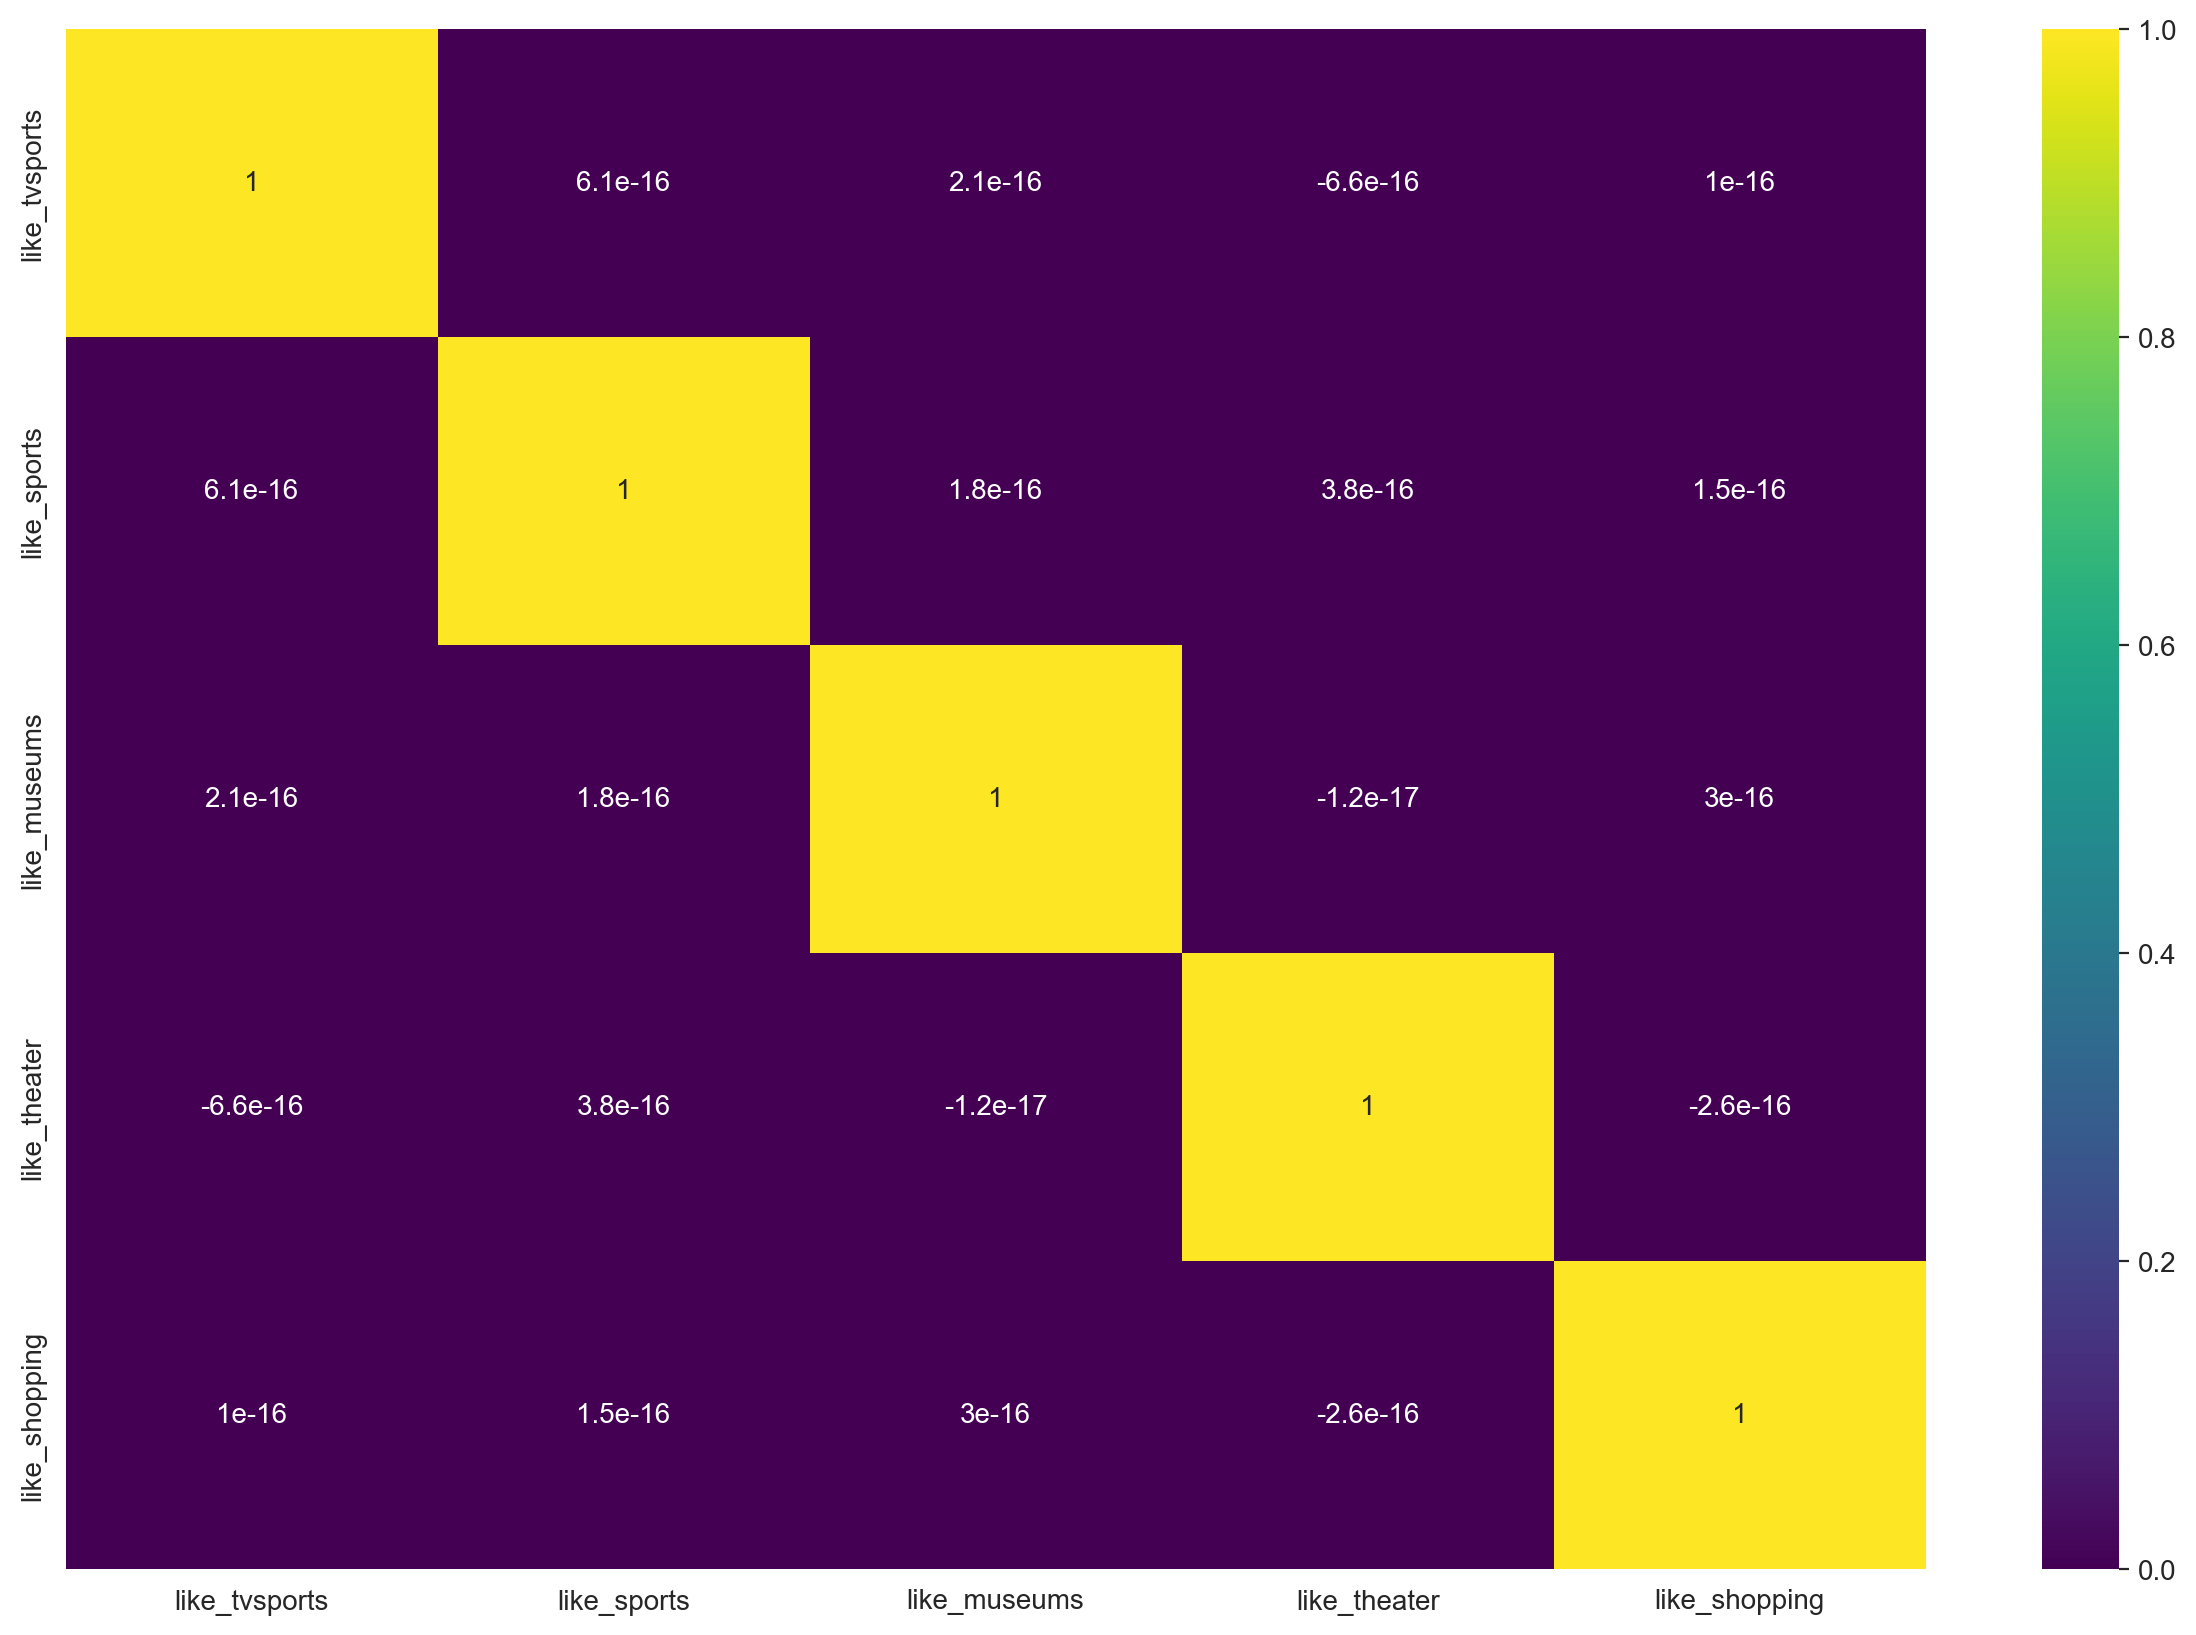

In [73]:
# A:

plt.figure(figsize=(15,10))
sns.heatmap(like_trans.corr(), 
            annot = True, 
            cmap = 'viridis');

---

### 8) Use PCA for dimensionality reduction.

Using linear regression, let's predict whether or not a user likes reading.

**The key question:** Can we get the same prediction accuracy using only the first three principal components as features versus using all five original values as features?

In [75]:
reading = sd['like_reading'].values
reading

array([ 6., 10.,  7.,  7.,  6.,  9.,  8.,  8.,  8.,  8.,  9.,  6.,  6.,
        6.,  8.,  8.,  4.,  6.,  8.,  8.,  7.,  8., 10.,  6.,  9.,  5.,
        8.,  7.,  8.,  6.,  9., 10.,  7.,  7.,  9.,  5.,  2., 10.,  7.,
        6.,  9.,  9.,  8.,  6.,  7.,  7.,  4.,  9.,  5.,  5.,  3.,  9.,
        7.,  9.,  6.,  9.,  5., 10.,  7., 10.,  8.,  8.,  8.,  6., 10.,
        8.,  8.,  7.,  5.,  5., 10.,  8.,  7.,  6.,  9.,  4., 10.,  7.,
        8.,  8.,  9.,  8.,  4.,  9., 10.,  8., 10.,  7., 10.,  7.,  9.,
        7.,  8.,  8.,  7.,  6.,  6.,  8.,  5.,  8.,  7.,  8.,  9.,  7.,
        7., 10.,  7.,  9.,  9.,  8.,  8., 10., 10.,  8.,  9., 10.,  7.,
        6.,  2.,  8.,  9., 10.,  1.,  5.,  9.,  6.,  8.,  5.,  6.,  8.,
        7.,  4.,  9., 10.,  9.,  3.,  6.,  9.,  7.,  8., 10., 10., 10.,
        6.,  7.,  8., 10., 10.,  8., 10., 10.,  7.,  8.,  8.,  6.,  9.,
        5.,  8.,  7., 10.,  9.,  6.,  5.,  4.,  9.,  9.,  7.,  7.,  8.,
        6.,  5.,  9.,  8., 10.,  6.,  9.,  7.,  7.,  8.,  9.,  6

**8.A) Linear regression cross-validated on original variables (`sd_like.values`).**

- What is the mean cross-validation score?
- Keep in mind that linear regression uses $R^2$ for score, so one is the ideal score.

In [77]:
y = reading

In [134]:
# A:
lr = LinearRegression()

cv_scores_original = cross_val_score(lr, sd_like, y, cv=5)  # R^2 score
mean_cv_original = np.mean(cv_scores_original)
mean_cv_original

0.09193231749299206

**8.B) Linear regression on the first principal component.**

- What is the mean cross-validation score?

In [136]:
# A:

pca_1 = PCA(n_components=1)
X_pc1 = pca_1.fit_transform(sd_like)


cv_scores_pc1 = cross_val_score(lr, X_pc1, y, cv=5) 
mean_cv_pc1 = cv_scores_pc1.mean()
print(f"Mean CV Score (First Principal Component): {mean_cv_pc1:.4f}")


Mean CV Score (First Principal Component): 0.0146


**8.C) Linear regression on first three principal components.**

- What is the mean cross-validation score?

In [82]:
# A:

sd_pca3 = PCA(n_components=3)
sdt_3 = sd_pca3.fit(like_trans)
sdt_3 =sd_pca.transform(like_trans)
like_trans3 = pd.DataFrame(sdt_3, columns=preference_cols)

In [83]:
cv_scores_pca_3 = cross_val_score(lr, like_trans3, y, cv=5)  
mean_cv_pca3 = np.mean(cv_scores_pca_3)
mean_cv_pca3

0.09193231749299235

---

**Check yourself**. The mean cross-validation score should be nearly the same for the first three principal components as it was on the original five-component data.